In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as p
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm


In [2]:
data = pd.read_csv('multiple2.txt', header=None, names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,5.35,4.48,0
1,6.72,5.37,0
2,3.57,5.25,0
3,4.77,7.65,1
4,2.25,4.07,1


In [3]:
data['y'].value_counts()

0    150
1    150
Name: y, dtype: int64

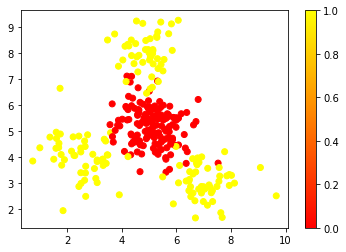

In [4]:
plt.scatter(data['x1'], data['x2'], c=data['y'], cmap='autumn')
plt.colorbar()

In [5]:
#整理输入输出

In [6]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [7]:
train_x, text_x, train_y, text_y = ms.train_test_split(x, y, train_size=0.1, random_state=7, stratify=y)

In [70]:
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='poly', degree=4)
model = svm.SVC(kernel='rbf', gamma=0.1, C=1)

In [72]:
model.fit(train_x, train_y)

SVC(C=1, gamma=0.1)

In [71]:
pred_y = model.predict(text_x)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [68]:
print(sm.classification_report(text_y, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       135
           1       0.93      0.93      0.93       135

    accuracy                           0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270



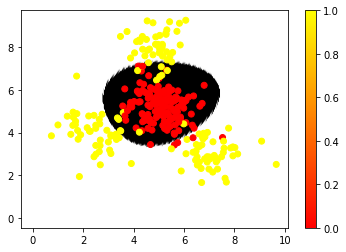

In [73]:
x1 = np.linspace(0, 9.66, 200)
x2 = np.linspace(0, 9.27, 200)
map1 = []
for i in x1:
    for j in x2:
        temp = [i, j]
        map1.append(temp)
pmap = pd.DataFrame(map1)
pmap.columns = ['x1', 'x2']
p_y = model.predict(pmap)
plt.scatter(pmap['x1'], pmap['x2'], c=p_y, cmap='gray')
plt.scatter(data['x1'], data['x2'], c=data['y'], cmap='autumn')
plt.colorbar()

In [74]:
###网格搜索

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as p
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

In [75]:
data = pd.read_csv('multiple2.txt', header=None, names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,5.35,4.48,0
1,6.72,5.37,0
2,3.57,5.25,0
3,4.77,7.65,1
4,2.25,4.07,1


In [76]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
train_x, text_x, train_y, text_y = ms.train_test_split(x, y, train_size=0.1, random_state=7, stratify=y)

In [80]:
params = [
    {'kernel': ['linear'], 'C': [1, 10, 100]},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [1, 10, 100]},
    {'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01], 'C': [1, 10, 100]}
]

In [81]:
model = ms.GridSearchCV(svm.SVC(), param_grid=params, cv=5)

In [82]:
model.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                          'kernel': ['rbf']}])

In [83]:
print("best_score_最优的得分:", model.best_score_)
print("best_params_最优秀的参数:\n", model.best_params_)
#print("best_estimator_:\n", model.best_estimator_)

best_score_最优的得分: 0.95
best_params_最优秀的参数:
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
